# HW4 Report Yufeng Yang

## Part I

In [35]:
import numpy as np
from matplotlib import pyplot as plt

In [36]:
#generate matrix following the rule
def matrix_generator(n, epsilon):
    A = np.random.normal(0,1,n)
    return np.matmul(np.transpose(A), np.transpose(A))+ epsilon*np.identity(n)

In [37]:
# set up FW update for quadratic function.
def Frank_Wolfe_Quadratic(x, Q, eta):
    eq = np.matmul(Q,x)
    return (1-eta)*x+eta*(eq/np.linalg.norm(eq))

In [38]:
# Test starts here.
np.random.seed(123)
n = 50
epsilon = 0.6
Q = matrix_generator(n, epsilon)
lr = 0.1
eta = lr
x0 = 0.3*np.random.normal(0,0.5,n)
max_iter = 1000
eig_val, eig_vec = np.linalg.eigh(Q)
lambda1 = eig_val.max()
count = 0
while count < max_iter:
    x0 = Frank_Wolfe_Quadratic(x0, Q, eta)
    count += 1
    



In [39]:
# print the 2-norm difference between Qx and \lambda_{max}x
print(np.linalg.norm(np.matmul(Q, x0)-lambda1* x0))


3.629531304419418e-12


## Part II

In [40]:
import numpy as np
from matplotlib import pyplot as plt

In [41]:
# define a function to generate experimental data.
# Input args: m,n are matrix shape; mu and sigma are for noise data.
def data_generator(m,n,mu, sigma):
    # A is a matrix with size R^{m*n}
    
    A = np.empty([m,n])
    # ground truth 
    z = np.random.rand(n,1)
    # create noise vector with the length equals to m
    for i in range(m):
        for j in range(n):
            A[i,j] = np.random.normal(mu, 1)
        norm_A_i = np.linalg.norm(A[i,:],2)
        # scale each row of A such that the norm of each row is equal to 1.
        A[i,:] = A[i,:]/norm_A_i
    delta = np.random.normal(mu, sigma, size=(m,1))
    return A, z, delta

In [42]:
# Compute L_{\infty} norm projection
def projection_L_infinity(x):
    n_row = np.shape(x)[0]
    proj_x = np.zeros((n_row,1))
    for indx in range(n_row):
        if np.absolute(x[indx]) <=  1:
            proj_x[indx] = x[indx]
        elif x[indx] <= -1:
            proj_x[indx] = -1
        else:
            proj_x[indx] = 1
    return proj_x
    

In [43]:
# compute training loss.
def least_square(A,x,b):
    residual = np.matmul(A,x)-b
    loss = 0.5*np.linalg.norm(residual,2)**2
    return loss

In [44]:
# define a function compute gradient
def least_square_grad(A,x,b):
    residual = np.matmul(A,x)-b
    # gradient is A^T(Ax-b)
    grad = np.matmul(np.transpose(A),residual)
    return grad

In [45]:
# Specify m, n
m = 500
n = 50
# Specify the mean and variance of noise \delta, which follows normal distribution.
mu = 0
# This can be changed.
sigma = 0.8
np.random.seed(123)
#####
A, z, delta = data_generator(m,n,mu,sigma)
# generate observations
b = np.matmul(A,z)+delta

# generate initial guess
x0 = z+np.random.normal(1,1,size = (z.shape[0],z.shape[1]))
#print(x0)
# specify learning rate
lr = 0.1
max_iter = 1000
count = 0
training_loss = np.empty(0)
###
err = least_square(A,x0,b)
training_loss = np.append(training_loss,err)
while count < max_iter:
    grad = least_square_grad(A,x0,b)
    x0 = x0 - lr*grad
    x0 = projection_L_infinity(x0)
    #print(x0)
    err = least_square(A,x0,b)
    training_loss = np.append(training_loss,err)
    count += 1

    

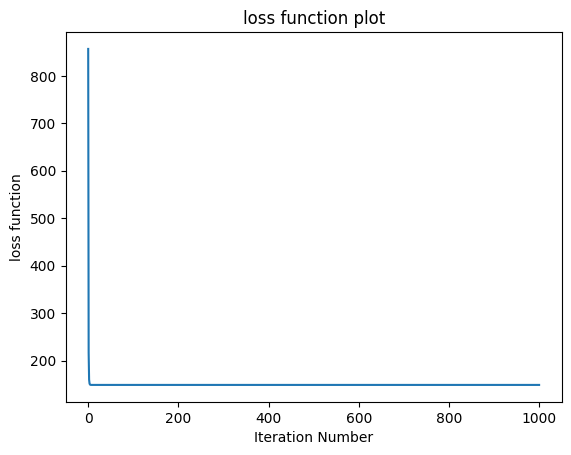

In [46]:
plt.plot(training_loss)
plt.xlabel('Iteration Number')
plt.ylabel('loss function')
plt.title('loss function plot')
plt.savefig("Visualization of loss function", dpi = 150)

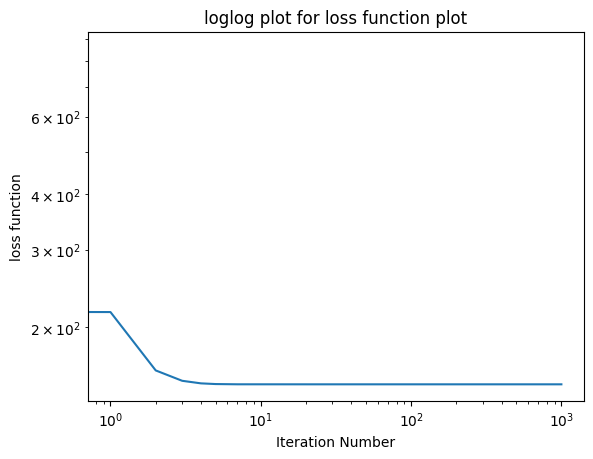

In [47]:
plt.loglog(training_loss)
plt.xlabel('Iteration Number')
plt.ylabel('loss function')
plt.title('loglog plot for loss function plot')
plt.savefig("Visualization of loss function", dpi = 150)